In [ ]:
#Research Question:
#What is the take of students and teachers about the usage of AI in education?

#Research Objective:
#To analyze the sentiments expressed by different stakeholders (teachers, students, parents, and tech teams) regarding AI in education.
#To identify the most frequently discussed keywords and their contextual usage using KWIC (Keyword in Context) analysis.
#To examine the sentiment distribution (positive, negative, neutral) across different sources such as newspapers, social media (Quora, Reddit, LinkedIn), and academic journals.
#o find the usagae of Keyword in context

#Research Method:
# To do a sentiment analysis, find Keywords in context and do a frequent word analysis.

#Corpus: approx 19k words
#Collated from Opinion pieces- Formal Sources: Indian Newspapers, LinkedIn Posts, and Journal Writing; Informal Sources: Quora Reviews and Reddit Posts
#Corpora is from 2020 to Feb 2025

In [72]:
with open("NYeshvi.txt", "r", encoding="utf-8") as file:
    text = file.read()
print(text)

﻿India’s growing emphasis on digitizing infrastructure is no longer limited to essential services. From e-commerce to governmental infrastructure, the country increasingly relies on digital systems, streamlining the efficiency of the process. This paradigm shift also leads to thousands of new jobs, highlighting the importance of tech education for the youth.
While tech education remains a broad term, the emergence of new digital technologies like Artificial Intelligence (AI) and Machine Learning (ML) is spearheading the shift among aspiring learners. In 2022, over 12 lakh undergraduate Indian students enrolled in computer science engineering. However, the emergence of EdTech platforms in India indicates that the total number of learners in digital tech education remains significantly higher. With IT emerging as one of the preferred employment destinations for Indians, a sector that employed more than 50 lakh professionals in March 2023, learning emerging technologies like AI and ML off

In [74]:
#Post importing the txt file, we should start with Frequently Occuring word with the steps written below
import re
from collections import Counter

# Convert text to lowercase
text = text.lower()

# Remove punctuation and special characters
text = re.sub(r"[^\w\s]", "", text)

# Tokenize (split text into words)
words = text.split()

In [76]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
#Using set() makes lookup operations faster compared to a list.

# Remove stopwords
filtered_words = [word for word in words if word not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nehay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
word_freq = Counter(filtered_words)

# Get the 10 most common words
common_words = word_freq.most_common(10)
print(common_words)

[('ai', 436), ('education', 230), ('learning', 228), ('students', 193), ('teachers', 92), ('india', 80), ('tools', 69), ('educational', 63), ('intelligence', 62), ('like', 61)]


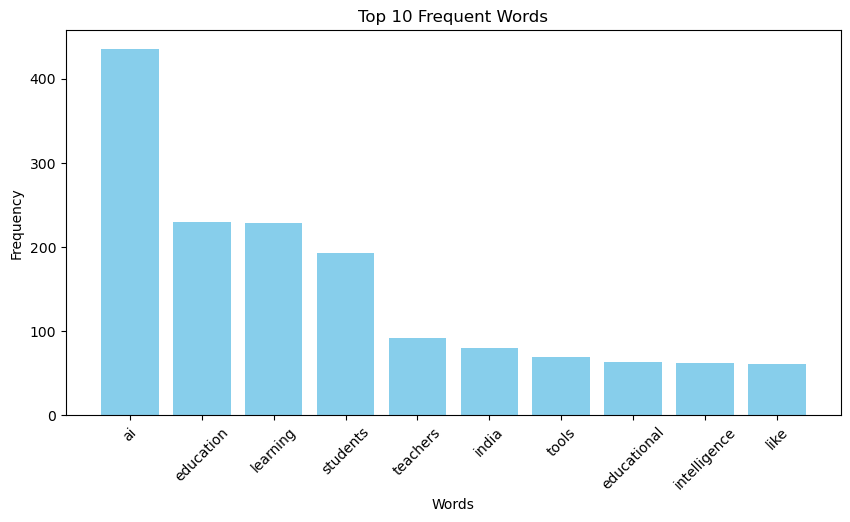

In [12]:
#Taken help from ChatGPT
import matplotlib.pyplot as plt

words, counts = zip(*common_words)

plt.figure(figsize=(10,5))
plt.bar(words, counts, color="skyblue")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Frequent Words")
plt.xticks(rotation=45)
plt.show()

In [16]:
#For KWIC (Keyword in Context)
def kwic(text, keyword, window=5):
    words = text.split()
    keyword = keyword.lower()
    
    for i, word in enumerate(words):
        if word == keyword:
            left_context = " ".join(words[max(i - window, 0): i])
            right_context = " ".join(words[i + 1: i + 1 + window])
            print(f"... {left_context} **{word}** {right_context} ...")

In [44]:
kwic(text, "students", window=7)

... in 2022 over 12 lakh undergraduate indian **students** enrolled in computer science engineering however the ...
... constructive career option for thousands of aspiring **students** additionally indias rapid internet penetration adds millions ...
... issue in indias larger education domain bringing **students** from diverse socioeconomic and linguistic backgrounds under ...
... as critical enablers of this shift helping **students** to learn complex disciplines with innovative iconographies ...
... computer vision nlp and others are helping **students** to gather cuttingedge knowledge however the absolute ...
... in 2022 over 12 lakh undergraduate indian **students** enrolled in computer science engineering however the ...
... constructive career option for thousands of aspiring **students** additionally indias rapid internet penetration adds millions ...
... issue in indias larger education domain bringing **students** from diverse socioeconomic and linguistic backgrounds under ..

In [46]:
kwic(text, "teachers", window=7)

... stakeholders in the educational journeyfrom students to **teachers** and administratorsstand to gain from the use ...
... written work and multiplechoice assessments freeing up **teachers** time for more important tasks 5 adaptive ...
... or personal assistants in smartphones collaboration between **teachers** and artificial intelligence making proper use of ...
... use of digital media technology can help **teachers** teach more effectively they should assist students ...
... effective for students introducing ai technology to **teachers** and students can help us to quick ...
... applications in higher education an analysis of **teachers** perspectives using structural equation modeling and the ...
... in india by enhancing personalized learning supporting **teachers** and improving administrative processes aipowered tools like ...
... jaiswal arun 2021 sihag vibha 2024 for **teachers** ai alleviates administrative burdens enabling more focus ...
... reserved wwwirjietcom 201 add

In [48]:
kwic(text, "ai", window=7)

... of new digital technologies like artificial intelligence **ai** and machine learning ml is spearheading the ...
... in march 2023 learning emerging technologies like **ai** and ml offers a constructive career option ...
... within digital mediums emerging new technologies like **ai** and ml significantly boost general business operability ...
... again stresses transforming tech education especially with **ai** and ml to sustain this push accessibility ...
... talented individuals in indias digital tech space **ai** and ml can act as the catalyst ...
... in disciplines like robotics cloud data science **ai** and ml is becoming more imperative than ...
... strategically addressed by integrating innovative technologies like **ai** and ml into the learning system from ...
... systems lms and methodical pedagogy relying on **ai** and ml to futureproof the learning process ...
... significant research to develop supportive technologies about **ai** and ml such as computer vision nlp ...

In [50]:
pip install nltk

In [60]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download("vader_lexicon")

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Read the text file
file_path = "NYeshvi.txt"

try:
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()

    # Get sentiment scores
    sentiment_scores = sia.polarity_scores(text)

    # Determine overall sentiment
    if sentiment_scores["compound"] >= 0.05:
        sentiment = "Positive"
    elif sentiment_scores["compound"] <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    # Print results
    print("\n🔹 Sentiment Analysis Results:")
    print(f"  Overall Sentiment: {sentiment}")
    print(f"  VADER Scores: {sentiment_scores}")

except FileNotFoundError:
    print("Error: The file 'NYeshvi.txt' was not found. Please check the file location.")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nehay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



🔹 Sentiment Analysis Results:
  Overall Sentiment: Positive
  VADER Scores: {'neg': 0.042, 'neu': 0.789, 'pos': 0.169, 'compound': 1.0}


In [62]:
pip install nltk matplotlib


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nehay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



🔹 Sentiment Analysis Results:
  Overall Sentiment: Positive
  VADER Scores: {'neg': 0.042, 'neu': 0.789, 'pos': 0.169, 'compound': 1.0}


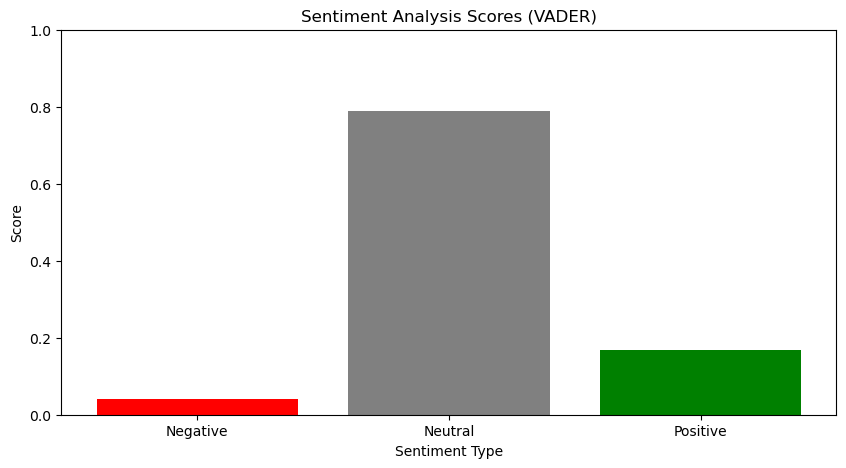

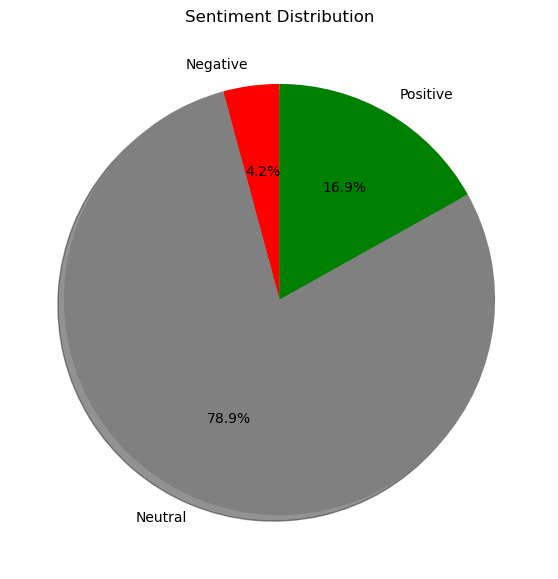

In [64]:
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download("vader_lexicon")

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Read the text file
file_path = "NYeshvi.txt"

try:
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()

    # Get sentiment scores
    sentiment_scores = sia.polarity_scores(text)
    neg, neu, pos, compound = sentiment_scores["neg"], sentiment_scores["neu"], sentiment_scores["pos"], sentiment_scores["compound"]

    # Determine overall sentiment
    sentiment_label = "Positive" if compound >= 0.05 else "Negative" if compound <= -0.05 else "Neutral"

    print("\n🔹 Sentiment Analysis Results:")
    print(f"  Overall Sentiment: {sentiment_label}")
    print(f"  VADER Scores: {sentiment_scores}")

    # 📊 Bar Chart Visualization
    labels = ["Negative", "Neutral", "Positive"]
    values = [neg, neu, pos]
    colors = ["red", "gray", "green"]

    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color=colors)
    plt.xlabel("Sentiment Type")
    plt.ylabel("Score")
    plt.title("Sentiment Analysis Scores (VADER)")
    plt.ylim(0, 1)
    plt.show()

    # 🥧 Pie Chart Visualization
    plt.figure(figsize=(7, 7))
    plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, shadow=True)
    plt.title("Sentiment Distribution")
    plt.show()

except FileNotFoundError:
    print("Error: The file 'NYeshvi.txt' was not found. Please check the file location.")


In [66]:
#Things to do ahead: Topic Modelling, Clustering, Vectorization (TF-IDF), Word Embedding